In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Install kagglehub if not already installed. Uncomment and run the line below if needed.
#!pip install kagglehub

# Load in data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeeshier/weather-forecast-dataset")
print(path)
df = pd.read_csv(f'{path}/weather_forecast_data.csv')
np.random.seed(42)

df.head()

C:\Users\srhal\.cache\kagglehub\datasets\zeeshier\weather-forecast-dataset\versions\1


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


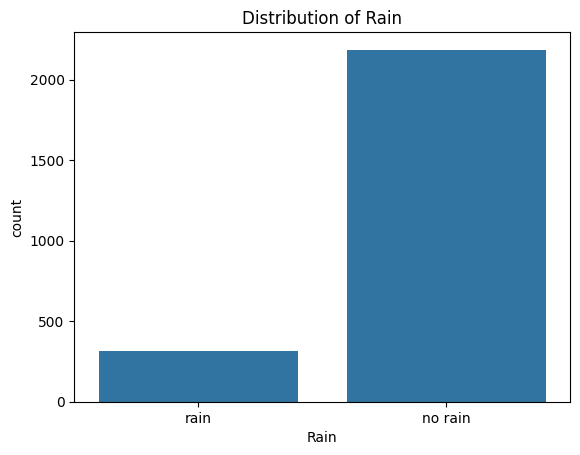

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593


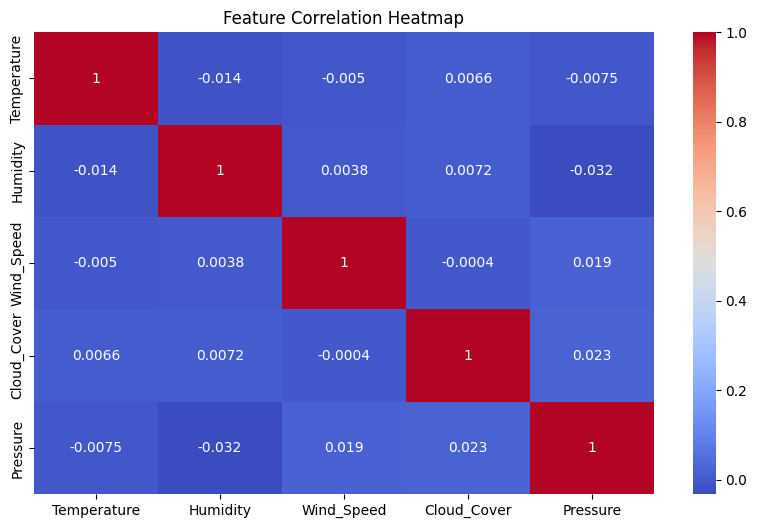

In [3]:
sns.countplot(data=df, x='Rain')
plt.title('Distribution of Rain')
plt.show()

print(df.describe())

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [4]:
df_rain = df.copy()

df_rain['Rain'] = df_rain['Rain'].map({'rain': 1, 'no rain': 0})

X = df_rain.drop('Rain', axis=1)
y = df_rain['Rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
mlp_rain = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42, activation='relu', solver='adam')
mlp_rain.fit(X_train, y_train)
y_pred_rain = mlp_rain.predict(X_test)

# TODO: Test different architectures (adjust the 'hidden_layer_sizes' value)

hidden_sizes = [(1,), (2,), (10,), (50,), (100,), (10, 10), (50, 10), (100, 100)]
architecture_results = []

for sizes in hidden_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=sizes, max_iter=1000, activation='relu', random_state=42, solver='adam')
    mlp.fit(X_train, y_train)
    y_pred_val = mlp.predict(X_test)
    
    size_accuracy_score = mlp.score(X_test, y_test)
    size_recall_value = recall_score(y_test, y_pred_val)
    architecture_results.append((sizes, size_accuracy_score, size_recall_value))
    
    #print(f"Hidden sizes: {sizes}")
    #print("Validation set classification report:")
    #print('Accuracy:', size_accuracy_score, '\n')
    

activations = ['identity', 'logistic', 'tanh', 'relu']
activation_results = []

for activation in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, activation=activation, random_state=42, solver='adam')
    mlp.fit(X_train, y_train)
    y_pred_val = mlp.predict(X_test)
    activation_accuracy_score = mlp.score(X_test, y_test)
    activation_recall_value = recall_score(y_test, y_pred_val)
    activation_results.append((activation, activation_accuracy_score, activation_recall_value))
    
    #print(f"Activation function: {activation}")
    #print("Validation set classification report:")
    #print('Accuracy:', activation_accuracy_score, '\n')
    
best_architecture = max(architecture_results, key=lambda x: x[1])
best_activation = max(activation_results, key=lambda x: x[1])

all_best_architecture = [x for x in architecture_results if x[1] == best_architecture[1]]
all_best_activation = [x for x in activation_results if x[1] == best_activation[1]]

print("Best Architectures by accuracy:")
for architecture in all_best_architecture:
    print(f"Hidden sizes: {architecture[0]}, Accuracy: {architecture[1]}, Recall: {architecture[2]}")
print("\nBest Activation Functions by accuracy:")
for activation in all_best_activation:
    print(f"Activation: {activation[0]}, Accuracy: {activation[1]}, Recall: {activation[2]}")

Best Architectures by accuracy:
Hidden sizes: (50,), Accuracy: 0.9893333333333333, Recall: 0.9318181818181818
Hidden sizes: (10, 10), Accuracy: 0.9893333333333333, Recall: 0.9545454545454546

Best Activation Functions by accuracy:
Activation: relu, Accuracy: 0.984, Recall: 0.9090909090909091


In [6]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
random_forest_recall = recall_score(y_test, y_pred_random_forest, pos_label=1)

print(f"Random Forest - Accuracy: {random_forest_accuracy}, Recall: {random_forest_recall}")

Random Forest - Accuracy: 0.9986666666666667, Recall: 0.9886363636363636


In [7]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_logistic = logistic_regression.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_regression_recall = recall_score(y_test, y_pred_logistic, pos_label=1)

print(f"Logistic Regression - Accuracy: {logistic_regression_accuracy}, Recall: {logistic_regression_recall}")

Logistic Regression - Accuracy: 0.9266666666666666, Recall: 0.5909090909090909


In [8]:
random_forest_importances = random_forest.feature_importances_
features = df_rain.drop('Rain', axis=1).columns
random_forest_importance_df = pd.DataFrame({'Feature': features, 'Importance': random_forest_importances})
random_forest_importance_df = random_forest_importance_df.sort_values(by='Importance')

logistic_regression_importances = np.abs(logistic_regression.coef_[0])
logistic_regression_importance_df = pd.DataFrame({'Feature': features, 'Importance': logistic_regression_importances})
logistic_regression_importance_df = logistic_regression_importance_df.sort_values(by='Importance')

mlp_importances = np.abs(mlp_rain.coefs_[0]).sum(axis=1)
mlp_importance_df = pd.DataFrame({'Feature': features, 'Importance': mlp_importances})
mlp_importance_df = mlp_importance_df.sort_values(by='Importance')
mlp_importance_df.head()

,Feature,Importance
4,Pressure,0.760739
2,Wind_Speed,0.826170
0,Temperature,8.192199
3,Cloud_Cover,9.058030
1,Humidity,12.280721


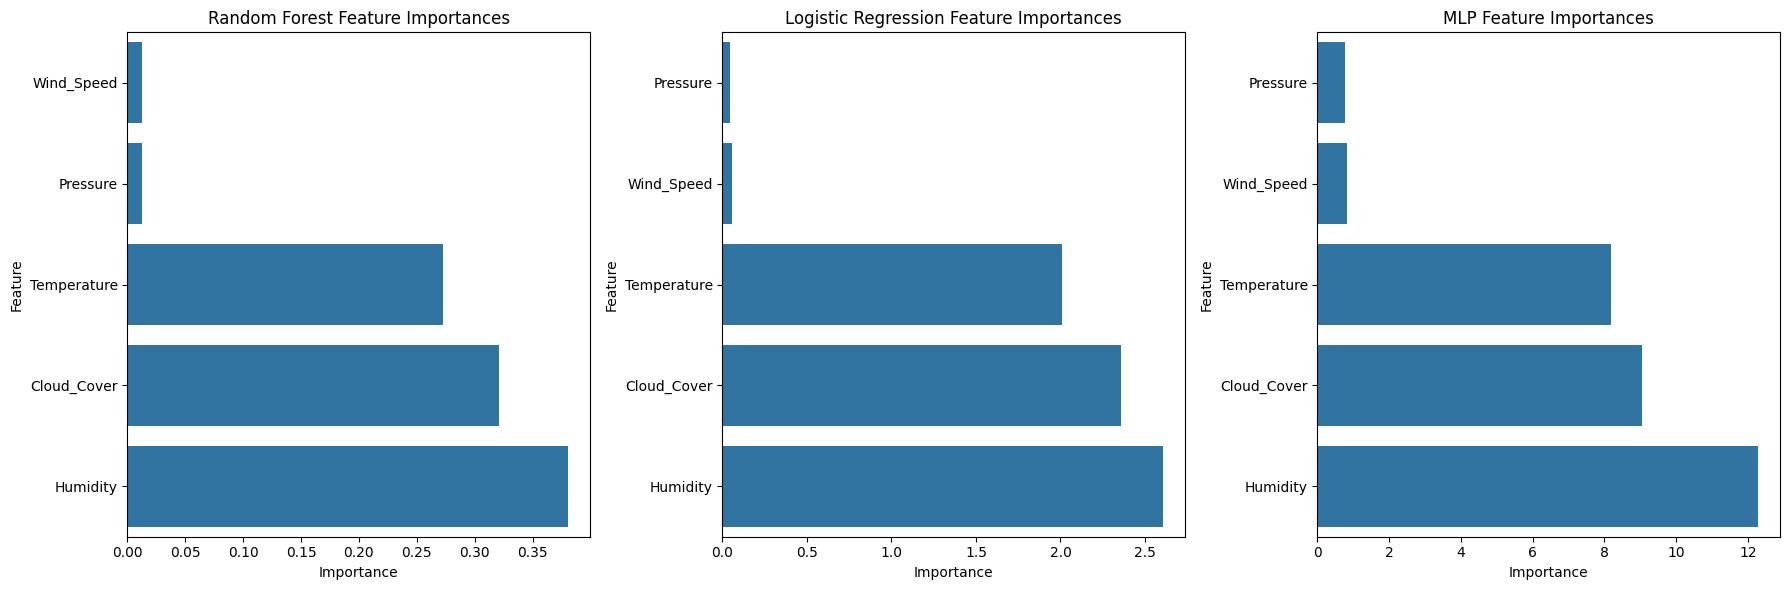

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Importance', y='Feature', data=random_forest_importance_df, ax=axes[0])
axes[0].set_title('Random Forest Feature Importances')

sns.barplot(x='Importance', y='Feature', data=logistic_regression_importance_df, ax=axes[1])
axes[1].set_title('Logistic Regression Feature Importances')

sns.barplot(x='Importance', y='Feature', data=mlp_importance_df, ax=axes[2])
axes[2].set_title('MLP Feature Importances')

plt.tight_layout()
plt.show()

In [10]:
best_arch = all_best_architecture[1]
best_act = all_best_activation[0]
compare_accuracy = [
    ('Best MLP Architecture', best_arch[1], best_arch[2]),
    ('Best MLP Activation', best_act[1], best_act[2]),
    ('Random Forest', random_forest_accuracy, random_forest_recall),
    ('Logistic Regression', logistic_regression_accuracy, logistic_regression_recall)
]
sorted_models = sorted(compare_accuracy, key=lambda x: x[1], reverse=True)

for model in sorted_models:
    print(f"Model: {model[0]}, Accuracy: {model[1]}, Recall: {model[2]}")

Model: Random Forest, Accuracy: 0.9986666666666667, Recall: 0.9886363636363636
Model: Best MLP Architecture, Accuracy: 0.9893333333333333, Recall: 0.9545454545454546
Model: Best MLP Activation, Accuracy: 0.984, Recall: 0.9090909090909091
Model: Logistic Regression, Accuracy: 0.9266666666666666, Recall: 0.5909090909090909
